<a href="https://colab.research.google.com/github/Dmolight01/ProyectoModelosII/blob/main/Pycaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#USO DE PYCARET PARA ANALISIS DE MODELOS

En el presente notebook hacemos uso de la libreria Pycaret para analizar varios modelos con nuestros datos y escoger los mejores para el entrenamiento.

Primero instalamos la libreria.

In [1]:
pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 37.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 42.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.4 MB/s

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from pycaret.classification import *

En este caso trabajamos con dos archivos. Los datos balanceado con Oversampling y sin balancear. Por favor carguelos en el entorno antes de continuar.

Puede descargarla del siguiente link(data_resampled)
https://drive.google.com/file/d/1ZfDISHlfVL4P42ZBD9uC1Bl82YxvFqO4/view?usp=drive_link

Puede descargarla del siguiente link(base_de_datos_preprocesada)
https://drive.google.com/file/d/1iLscCDL4PIE4Kiym-BcWa9LDPPcU96qV/view?usp=sharing

Tambien puede descargarla de la carpeta del github. Los archivos se llaman: data_resampled.csv y base_de_datos_preprocesada.csv

In [ ]:
dataset = pd.read_csv('data_resampled.csv')

In [ ]:
datasetB = pd.read_csv('base_de_datos_preprocesada.csv')

In [ ]:
dataset.shape

(1018, 53)

In [ ]:
datasetB.shape

(617, 54)

Hacemos la particion de los datos

In [ ]:
data=dataset.sample(frac=0.95,random_state=0)
data

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FL,FR,GB,GE,GF,GH,GI,GL,EJ_encoded,Class
478,0.346113,2225.26986,85.200147,9.681222,8.138688,5.492580,0.027710,3.396778,1.229900,5360.95442,...,3.949109,0.94569,18.650510,72.611063,946.979748,40.387734,55.490900,0.126590,1,0
635,1.008428,2913.38234,85.200147,36.185348,8.138688,6.520224,0.130935,10.536944,4.989880,3319.66123,...,0.173229,0.86942,11.618198,72.611063,1307.646666,35.316011,12.947448,21.978000,0,1
247,0.346113,3260.84957,177.924870,20.288447,8.138688,4.048563,0.071862,3.396778,1.229900,5087.57657,...,5.524359,1.12433,29.757098,72.611063,4186.582848,30.504758,63.482104,0.291966,1,0
783,0.260653,5010.12842,85.200147,11.068678,8.138688,2.693136,0.025578,3.396778,2.438716,8245.67201,...,9.110839,0.76821,18.371450,72.611063,2798.992584,17.767775,36.864476,0.100967,1,1
27,0.273472,2310.59664,85.200147,13.217996,8.138688,5.377413,0.071862,13.599716,1.229900,5224.25351,...,0.173229,1.60254,28.212966,72.611063,30045.933290,32.294559,28.675228,21.978000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
714,2.371515,7040.37048,846.122895,22.793920,8.138688,5.616606,0.025578,17.336802,4.230856,3659.77955,...,0.173229,3.08444,26.222338,72.611063,29405.203520,45.939466,27.363508,21.978000,0,1
543,0.363205,6776.09196,85.200147,15.026644,8.138688,6.839148,0.025578,10.852044,1.229900,4043.57121,...,4.072643,1.87659,12.994894,72.611063,6171.724935,25.581875,52.394212,0.171346,1,0
544,0.235015,2763.25522,133.134483,12.871132,8.138688,3.968832,0.025578,6.535174,1.229900,4328.66240,...,0.397477,0.49706,16.464540,203.994728,2524.751532,36.268587,35.056360,11.880000,1,0
639,0.264926,1390.03590,85.200147,11.601362,10.217934,5.660901,0.074907,3.396778,3.113404,4906.73890,...,31.251519,1.13593,22.966638,72.611063,4646.471769,23.356717,46.537768,0.062450,1,1


In [ ]:
data_unseen=dataset.drop(data.index)
data_unseen

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FL,FR,GB,GE,GF,GH,GI,GL,EJ_encoded,Class
9,0.324748,5188.68207,85.200147,12.968687,8.138688,4.593392,0.025578,10.685041,1.229900,4951.698630,...,0.173229,1.57151,24.515421,98.929757,5563.130949,21.994831,33.300970,21.978000,0,0
70,0.188012,2351.13406,85.200147,12.291993,8.138688,3.171522,0.025578,7.852292,1.229900,4131.189550,...,0.173229,0.49706,10.213596,72.611063,2083.716738,33.440627,25.925760,21.978000,0,0
72,0.416617,4663.52150,214.659432,63.971632,22.281756,5.085066,0.047502,12.162860,7.231812,4420.843030,...,0.173229,1.65822,16.027346,87.871798,23639.947850,22.928802,117.571264,21.978000,0,0
87,0.175193,2110.99988,85.200147,15.382799,9.263526,4.766142,0.039890,14.343352,1.229900,3909.970420,...,0.173229,1.72347,9.953140,131.946832,25097.255300,45.143172,68.353472,21.978000,0,0
99,0.170920,1549.40016,85.200147,14.487766,8.138688,5.767209,0.049938,9.560134,5.896492,5486.860840,...,0.173229,2.00970,19.887676,281.460074,14301.991480,26.809805,101.938648,21.978000,0,0
115,2.042494,3209.18378,105.701133,14.837727,8.138688,9.992952,0.025578,13.177482,1.229900,6366.320140,...,0.173229,0.76386,16.594768,140.632863,14173.430870,29.034963,21.499348,21.978000,0,0
147,0.333294,4239.49152,129.137052,102.612901,8.138688,3.596754,0.025578,10.335280,1.229900,4393.349440,...,2.855572,1.65010,10.687998,138.843978,3272.364360,29.131709,49.042896,0.095264,1,0
174,0.482849,192.59328,85.200147,37.668811,8.138688,1.878108,0.029232,3.396778,4.188688,2185.257010,...,0.173229,0.98368,13.339068,139.745046,30872.916720,16.465425,124.183876,21.978000,0,0
177,0.452938,2379.68401,92.472162,41.992223,8.138688,7.220085,0.025578,6.302000,1.229900,2211.528130,...,2.811204,0.49706,11.599594,72.611063,762.097329,52.670755,10.840980,0.068062,1,0
192,0.183739,4592.72198,85.200147,18.154614,8.138688,1.169388,0.025578,14.935740,1.229900,6398.160290,...,10.207727,1.19190,25.868862,409.822511,6616.737882,28.041456,24.848092,0.368280,1,0


In [ ]:
datab=datasetB.sample(frac=0.95,random_state=0)
datab

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FL,FR,GB,GE,GF,GH,GI,GL,Class,EJ_encoded
49,1360fac6a227,0.478576,5192.25520,194.576478,13.230384,8.138688,7.290957,0.025578,9.705080,8.588216,...,10.690335,1.85861,12.418170,72.611063,434.357883,34.411808,36.769312,0.050038,1,1
514,d061b54c6650,0.329021,2561.59904,85.200147,24.045108,8.138688,3.711921,0.025578,10.631474,1.229900,...,8.013052,0.69977,17.255210,72.611063,3086.887077,31.944785,47.672020,0.108486,0,1
211,51a5b926ab4d,0.264926,2993.18184,117.771807,19.350056,8.138688,9.124770,0.025578,14.979854,1.229900,...,0.173229,1.72956,40.435794,72.611063,14566.937780,21.619010,26.900548,21.978000,0,0
249,6468478fce4c,0.927241,8941.06389,514.858662,72.197264,35.121690,6.263313,0.097135,10.133616,5.854324,...,27.212010,0.78561,34.854594,172.342506,27313.911020,35.189497,111.642804,0.001129,1,1
142,3840054e6aa5,0.444392,2673.56276,104.586381,31.967234,8.138688,6.041838,0.025578,11.595680,1.229900,...,11.421984,1.46392,20.427192,72.611063,1448.445726,41.053793,83.579712,0.045692,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,332a3850302f,0.529852,3287.77933,85.200147,22.632876,8.138688,8.726115,0.025578,15.238236,1.229900,...,4.949731,0.49706,38.645159,117.233806,1577.712735,32.223860,40.028036,0.153621,0,1
28,0e17c8abe9b6,0.121780,4306.18430,85.200147,11.325729,8.138688,6.493647,0.025578,16.133120,6.497386,...,0.173229,1.50742,22.952685,136.229114,5164.049376,33.306671,71.065646,21.978000,0,0
183,4671650635ab,0.354659,5368.11176,85.200147,30.895672,13.540008,6.688545,0.032886,13.524092,3.120432,...,5.928993,1.51206,19.841166,155.957644,6206.977188,19.762231,31.041468,0.073686,0,1
459,b3807c5f43e8,0.277745,1929.21553,85.200147,12.833968,8.138688,6.112710,0.025578,22.882562,1.229900,...,7.263597,1.09678,24.361938,126.761274,9404.826084,53.746124,46.892704,0.214376,0,1


In [ ]:
datab_unseen=datasetB.drop(datab.index)
datab_unseen

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FL,FR,GB,GE,GF,GH,GI,GL,Class,EJ_encoded
9,05f2bc0155cd,0.324748,5188.68207,85.200147,12.968687,8.138688,4.593392,0.025578,10.685041,1.229900,...,0.173229,1.57151,24.515421,98.929757,5563.130949,21.994831,33.300970,21.978000,0,0
70,1a14973e1785,0.188012,2351.13406,85.200147,12.291993,8.138688,3.171522,0.025578,7.852292,1.229900,...,0.173229,0.49706,10.213596,72.611063,2083.716738,33.440627,25.925760,21.978000,0,0
72,1a954a747373,0.416617,4663.52150,214.659432,63.971632,22.281756,5.085066,0.047502,12.162860,7.231812,...,0.173229,1.65822,16.027346,87.871798,23639.947850,22.928802,117.571264,21.978000,0,0
87,21d33a9fee44,0.175193,2110.99988,85.200147,15.382799,9.263526,4.766142,0.039890,14.343352,1.229900,...,0.173229,1.72347,9.953140,131.946832,25097.255300,45.143172,68.353472,21.978000,0,0
99,27bfa971821f,0.170920,1549.40016,85.200147,14.487766,8.138688,5.767209,0.049938,9.560134,5.896492,...,0.173229,2.00970,19.887676,281.460074,14301.991480,26.809805,101.938648,21.978000,0,0
115,2e637b444de7,2.042494,3209.18378,105.701133,14.837727,8.138688,9.992952,0.025578,13.177482,1.229900,...,0.173229,0.76386,16.594768,140.632863,14173.430870,29.034963,21.499348,21.978000,0,0
147,3a73fce81608,0.333294,4239.49152,129.137052,102.612901,8.138688,3.596754,0.025578,10.335280,1.229900,...,2.855572,1.65010,10.687998,138.843978,3272.364360,29.131709,49.042896,0.095264,0,1
151,3bf81aff9bd6,0.162374,3301.14620,85.200147,7.680560,8.138688,4.961040,0.029232,10.461320,1.229900,...,1.718228,1.53352,22.687578,980.017458,2817.590832,20.662713,55.598924,16.038000,0,1
174,4401d2485580,0.482849,192.59328,85.200147,37.668811,8.138688,1.878108,0.029232,3.396778,4.188688,...,0.173229,0.98368,13.339068,139.745046,30872.916720,16.465425,124.183876,21.978000,0,0
177,4537a9a3ecde,0.452938,2379.68401,92.472162,41.992223,8.138688,7.220085,0.025578,6.302000,1.229900,...,2.811204,0.49706,11.599594,72.611063,762.097329,52.670755,10.840980,0.068062,0,1


In [ ]:
data.reset_index(inplace=True,drop=True)
data_unseen.reset_index(inplace=True,drop=True)
print('Data for Modeling: '+str(data.shape))
print('Unseen Data for prediction: '+str(data_unseen.shape))

Data for Modeling: (967, 53)
Unseen Data for prediction: (51, 53)


In [ ]:
datab.reset_index(inplace=True,drop=True)
datab_unseen.reset_index(inplace=True,drop=True)
print('Data for Modeling: '+str(datab.shape))
print('Unseen Data for prediction: '+str(datab_unseen.shape))

Data for Modeling: (586, 54)
Unseen Data for prediction: (31, 54)


## ¡¡IMPORTANTE!!
Primero corremos con la base de datos sin balancear

In [ ]:
modelb_setup=setup(data=datab, target='Class', session_id=124)

,Description,Value
0,Session id,124
1,Target,Class
2,Target type,Binary
3,Original data shape,"(586, 54)"
4,Transformed data shape,"(586, 54)"
5,Transformed train set shape,"(410, 54)"
6,Transformed test set shape,"(176, 54)"
7,Numeric features,52
8,Categorical features,1
9,Preprocess,True


In [ ]:
best_model=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8488,0.7724,0.3696,0.6533,0.4463,0.3712,0.4032,0.8750
ridge,Ridge Classifier,0.8463,0.8249,0.2286,0.6817,0.3133,0.2612,0.3220,0.0850
rf,Random Forest Classifier,0.8317,0.9140,0.0286,0.2000,0.0500,0.0433,0.0697,0.4420
knn,K Neighbors Classifier,0.8293,0.6546,0.1839,0.5633,0.2520,0.1931,0.2432,0.1100
et,Extra Trees Classifier,0.8293,0.8546,0.0143,0.1000,0.0250,0.0217,0.0348,0.2740
nb,Naive Bayes,0.8268,0.7913,0.2661,0.6250,0.3425,0.2596,0.3046,0.0990
dt,Decision Tree Classifier,0.8268,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1040
qda,Quadratic Discriminant Analysis,0.8268,0.4840,0.0000,0.0000,0.0000,0.0000,0.0000,0.1740
ada,Ada Boost Classifier,0.8268,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1110
gbc,Gradient Boosting Classifier,0.8268,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.3100


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


Ahora con los datos balanceados

In [ ]:
model_setup=setup(data=data, target='Class', session_id=123)

,Description,Value
0,Session id,123
1,Target,Class
2,Target type,Binary
3,Original data shape,"(967, 53)"
4,Transformed data shape,"(967, 53)"
5,Transformed train set shape,"(676, 53)"
6,Transformed test set shape,"(291, 53)"
7,Numeric features,52
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best_model=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9808,0.9992,0.9703,0.9906,0.9802,0.9616,0.9621,0.2230
rf,Random Forest Classifier,0.9734,0.9977,0.9852,0.9623,0.9735,0.9468,0.9473,0.4840
xgboost,Extreme Gradient Boosting,0.9675,0.9952,0.9881,0.9491,0.9679,0.9350,0.9364,0.2110
gbc,Gradient Boosting Classifier,0.9660,0.9930,0.9940,0.9412,0.9667,0.9320,0.9338,0.7920
lightgbm,Light Gradient Boosting Machine,0.9660,0.9974,0.9881,0.9465,0.9666,0.9321,0.9336,0.9550
ada,Ada Boost Classifier,0.9349,0.9662,0.9732,0.9048,0.9370,0.8699,0.8740,0.2530
dt,Decision Tree Classifier,0.9244,0.9251,0.9672,0.8933,0.9275,0.8491,0.8548,0.0610
ridge,Ridge Classifier,0.8920,0.9261,0.8806,0.9027,0.8899,0.7840,0.7870,0.0460
lda,Linear Discriminant Analysis,0.8787,0.9328,0.8716,0.8844,0.8771,0.7574,0.7587,0.0760
qda,Quadratic Discriminant Analysis,0.8092,0.9508,0.6596,0.9370,0.7711,0.6172,0.6471,0.0460


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

Como se puede ver, hay un mejor rendimientos en la mayoria de modelos con casi todas las metricas con los datos balanceados. Por esto, trabajaremos con estos de ahora en adelante.


## Random Forest

In [ ]:
rf=create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9853,1.0000,1.0000,0.9714,0.9855,0.9706,0.9710
1,0.9853,1.0000,1.0000,0.9714,0.9855,0.9706,0.9710
2,0.9559,0.9978,0.9706,0.9429,0.9565,0.9118,0.9122
3,0.9706,0.9983,0.9706,0.9706,0.9706,0.9412,0.9412
4,0.9412,0.9935,0.9412,0.9412,0.9412,0.8824,0.8824
5,0.9853,1.0000,1.0000,0.9706,0.9851,0.9706,0.9710
6,0.9701,0.9920,0.9697,0.9697,0.9697,0.9403,0.9403
7,0.9701,0.9955,1.0000,0.9429,0.9706,0.9403,0.9420
8,0.9701,1.0000,1.0000,0.9429,0.9706,0.9403,0.9420


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
print(rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


In [ ]:
tuned_rf=tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9265,0.9888,0.9118,0.9394,0.9254,0.8529,0.8533
1,0.9706,0.9965,0.9706,0.9706,0.9706,0.9412,0.9412
2,0.9265,0.9905,0.9412,0.9143,0.9275,0.8529,0.8533
3,0.9412,0.9827,0.9118,0.9688,0.9394,0.8824,0.8839
4,0.9118,0.9723,0.9118,0.9118,0.9118,0.8235,0.8235
5,0.9412,0.9913,0.9394,0.9394,0.9394,0.8823,0.8823
6,0.9552,0.9902,0.9697,0.9412,0.9552,0.9105,0.9109
7,0.9403,0.9848,0.9697,0.9143,0.9412,0.8807,0.8822
8,0.9552,0.9955,0.9697,0.9412,0.9552,0.9105,0.9109


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
print(tuned_rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


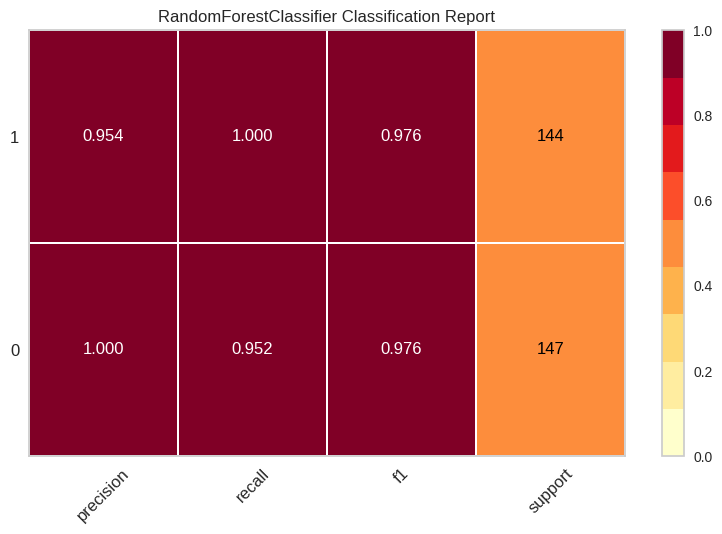

In [ ]:
plot_model(rf, plot = 'class_report')

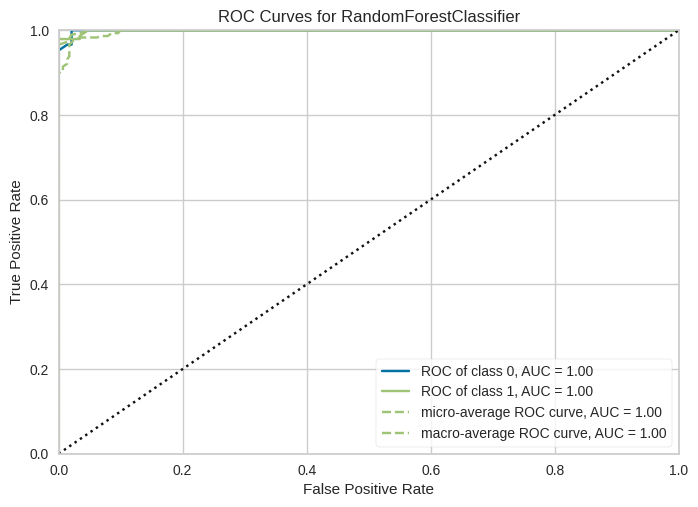

In [ ]:
plot_model(tuned_rf, plot='auc')

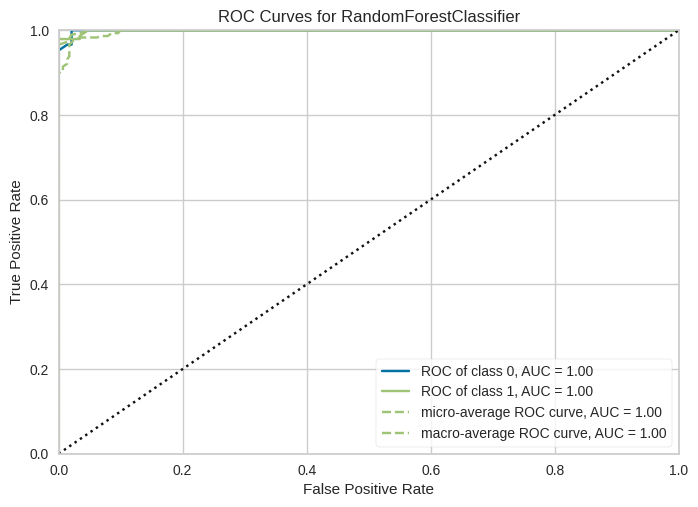

In [ ]:
plot_model(rf, plot='auc')

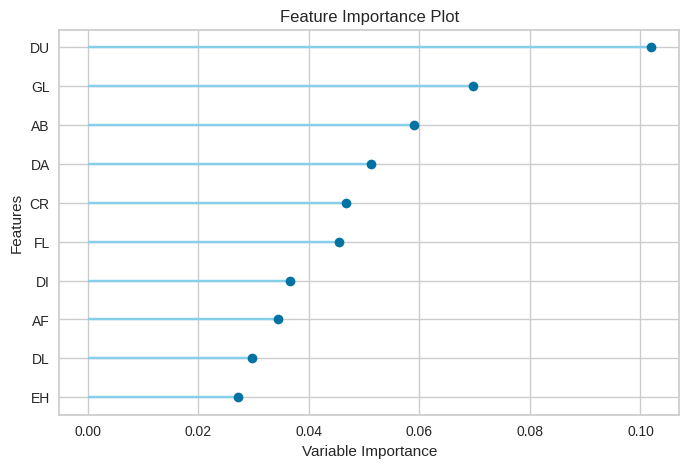

In [ ]:
plot_model(tuned_rf, plot='feature')

Entrenamos con los datos que no conoce el modelo

In [ ]:
unseen_predictions=predict_model(rf, data=data_unseen)
unseen_predictions

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,GB,GE,GF,GH,GI,GL,EJ_encoded,Class,prediction_label,prediction_score
0,0.324748,5188.682129,85.200150,12.968687,8.138688,4.593391,0.025578,10.685041,1.229900,4951.698730,...,24.515421,98.929756,5563.130859,21.994831,33.300968,21.978001,0,0,0,0.94
1,0.188012,2351.134033,85.200150,12.291993,8.138688,3.171522,0.025578,7.852292,1.229900,4131.189453,...,10.213596,72.611061,2083.716797,33.440628,25.925760,21.978001,0,0,0,0.88
2,0.416618,4663.521484,214.659439,63.971630,22.281755,5.085066,0.047502,12.162860,7.231812,4420.843262,...,16.027346,87.871796,23639.947266,22.928802,117.571266,21.978001,0,0,0,0.82
3,0.175193,2111.000000,85.200150,15.382799,9.263526,4.766142,0.039889,14.343352,1.229900,3909.970459,...,9.953140,131.946838,25097.255859,45.143173,68.353470,21.978001,0,0,0,0.93
4,0.170920,1549.400146,85.200150,14.487766,8.138688,5.767209,0.049938,9.560134,5.896492,5486.860840,...,19.887676,281.460083,14301.991211,26.809805,101.938644,21.978001,0,0,0,0.92
5,2.042494,3209.183838,105.701134,14.837727,8.138688,9.992952,0.025578,13.177482,1.229900,6366.320312,...,16.594769,140.632858,14173.430664,29.034964,21.499348,21.978001,0,0,0,0.81
6,0.333294,4239.491699,129.137054,102.612900,8.138688,3.596754,0.025578,10.335280,1.229900,4393.349609,...,10.687998,138.843979,3272.364258,29.131708,49.042896,0.095264,1,0,0,0.72
7,0.482849,192.593277,85.200150,37.668812,8.138688,1.878108,0.029232,3.396778,4.188688,2185.257080,...,13.339068,139.745041,30872.916016,16.465425,124.183876,21.978001,0,0,0,0.79
8,0.452938,2379.684082,92.472160,41.992222,8.138688,7.220085,0.025578,6.302000,1.229900,2211.528076,...,11.599594,72.611061,762.097351,52.670753,10.840980,0.068062,1,0,0,0.85
9,0.183739,4592.722168,85.200150,18.154613,8.138688,1.169388,0.025578,14.935740,1.229900,6398.160156,...,25.868862,409.822510,6616.737793,28.041456,24.848091,0.368280,1,0,0,0.88


In [ ]:
final_rf=finalize_model(rf)

In [ ]:
#Parametros finales del modelo Random Forest para su despliegue a producción
print(final_rf)

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['AB', 'AF', 'AH', 'AM', 'AR', 'AX',
                                             'AY', 'AZ', 'BC', 'BD ', 'BN',
                                             'BP', 'BR', 'BZ', 'CB', 'CC',
                                             'CD ', 'CF', 'CH', 'CL', 'CR',
                                             'CS', 'CU', 'CW ', 'DA', 'DE',
                                             'DF', 'DH', 'DI', 'DL', ...],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_featu...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                          

In [ ]:
save_model(final_rf, 'Final_RF_Model_19Apr2024')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['AB', 'AF', 'AH', 'AM', 'AR', 'AX',
                                              'AY', 'AZ', 'BC', 'BD ', 'BN',
                                              'BP', 'BR', 'BZ', 'CB', 'CC',
                                              'CD ', 'CF', 'CH', 'CL', 'CR',
                                              'CS', 'CU', 'CW ', 'DA', 'DE',
                                              'DF', 'DH', 'DI', 'DL', ...],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_featu...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
            

In [ ]:
saved_final_rf=load_model('Final_RF_Model_19Apr2024')

Transformation Pipeline and Model Successfully Loaded


## Gradient Boosting Classifier

In [ ]:
gbc=create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9706,0.9974,1.0000,0.9444,0.9714,0.9412,0.9428
1,0.9706,0.9983,1.0000,0.9444,0.9714,0.9412,0.9428
2,0.9559,0.9818,0.9706,0.9429,0.9565,0.9118,0.9122
3,0.9706,0.9749,1.0000,0.9444,0.9714,0.9412,0.9428
4,0.9559,0.9922,1.0000,0.9189,0.9577,0.9118,0.9153
5,0.9559,0.9905,1.0000,0.9167,0.9565,0.9119,0.9155
6,0.9701,0.9955,0.9697,0.9697,0.9697,0.9403,0.9403
7,0.9701,0.9991,1.0000,0.9429,0.9706,0.9403,0.9420
8,0.9552,1.0000,1.0000,0.9167,0.9565,0.9105,0.9142


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
print(gbc)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [ ]:
tuned_gbc=tune_model(gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9853,0.9974,1.0000,0.9714,0.9855,0.9706,0.9710
1,0.9706,1.0000,1.0000,0.9444,0.9714,0.9412,0.9428
2,0.9559,0.9896,0.9706,0.9429,0.9565,0.9118,0.9122
3,0.9706,0.9983,0.9706,0.9706,0.9706,0.9412,0.9412
4,0.9265,0.9913,0.9412,0.9143,0.9275,0.8529,0.8533
5,0.9559,0.9983,1.0000,0.9167,0.9565,0.9119,0.9155
6,0.9254,0.9929,0.9394,0.9118,0.9254,0.8508,0.8512
7,0.9851,0.9929,1.0000,0.9706,0.9851,0.9702,0.9706
8,0.9701,0.9982,1.0000,0.9429,0.9706,0.9403,0.9420


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
print(tuned_gbc)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


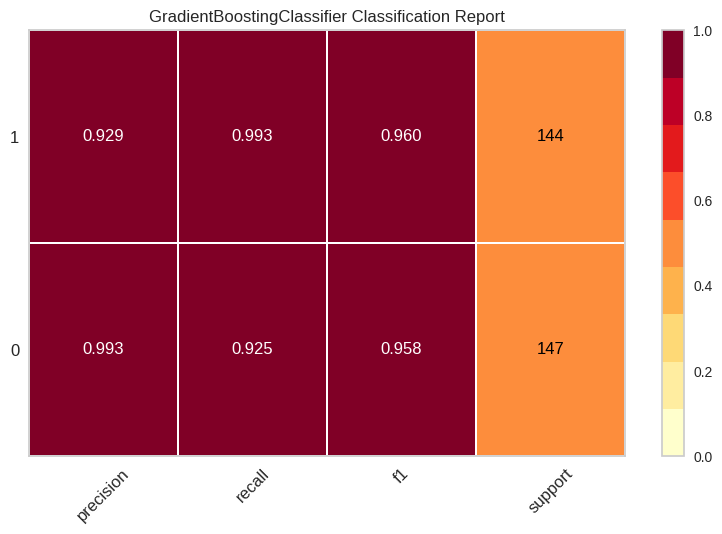

In [ ]:
plot_model(gbc, plot = 'class_report')

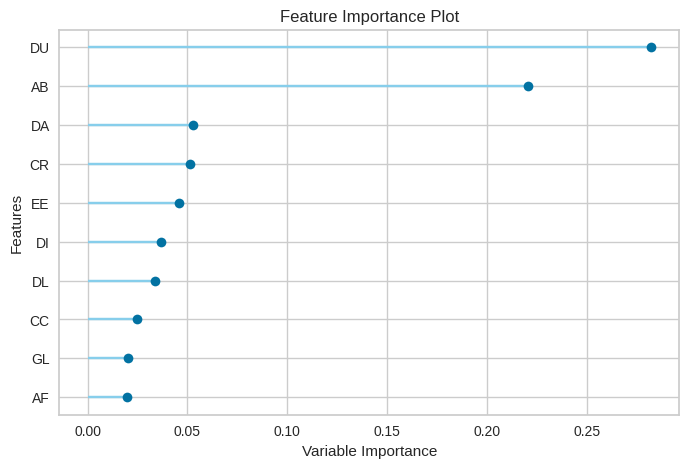

In [ ]:
plot_model(tuned_gbc, plot='feature')

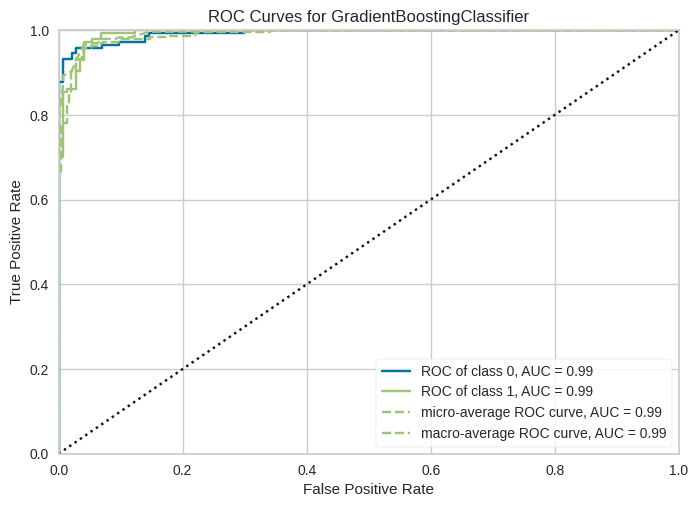

In [ ]:
plot_model(tuned_gbc, plot='auc')

Verificamos con los datos que el modelo no conoce

In [ ]:
unseen_predictions=predict_model(gbc, data=data_unseen)
unseen_predictions

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.9608,1.0000,0.9333,1.0000,0.9655,0.9202,0.9231


,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,GB,GE,GF,GH,GI,GL,EJ_encoded,Class,prediction_label,prediction_score
0,0.324748,5188.682129,85.200150,12.968687,8.138688,4.593391,0.025578,10.685041,1.229900,4951.698730,...,24.515421,98.929756,5563.130859,21.994831,33.300968,21.978001,0,0,0,0.9889
1,0.188012,2351.134033,85.200150,12.291993,8.138688,3.171522,0.025578,7.852292,1.229900,4131.189453,...,10.213596,72.611061,2083.716797,33.440628,25.925760,21.978001,0,0,0,0.9758
2,0.416618,4663.521484,214.659439,63.971630,22.281755,5.085066,0.047502,12.162860,7.231812,4420.843262,...,16.027346,87.871796,23639.947266,22.928802,117.571266,21.978001,0,0,0,0.8782
3,0.175193,2111.000000,85.200150,15.382799,9.263526,4.766142,0.039889,14.343352,1.229900,3909.970459,...,9.953140,131.946838,25097.255859,45.143173,68.353470,21.978001,0,0,0,0.9919
4,0.170920,1549.400146,85.200150,14.487766,8.138688,5.767209,0.049938,9.560134,5.896492,5486.860840,...,19.887676,281.460083,14301.991211,26.809805,101.938644,21.978001,0,0,0,0.9757
5,2.042494,3209.183838,105.701134,14.837727,8.138688,9.992952,0.025578,13.177482,1.229900,6366.320312,...,16.594769,140.632858,14173.430664,29.034964,21.499348,21.978001,0,0,0,0.9497
6,0.333294,4239.491699,129.137054,102.612900,8.138688,3.596754,0.025578,10.335280,1.229900,4393.349609,...,10.687998,138.843979,3272.364258,29.131708,49.042896,0.095264,1,0,0,0.9925
7,0.482849,192.593277,85.200150,37.668812,8.138688,1.878108,0.029232,3.396778,4.188688,2185.257080,...,13.339068,139.745041,30872.916016,16.465425,124.183876,21.978001,0,0,0,0.8954
8,0.452938,2379.684082,92.472160,41.992222,8.138688,7.220085,0.025578,6.302000,1.229900,2211.528076,...,11.599594,72.611061,762.097351,52.670753,10.840980,0.068062,1,0,0,0.9754
9,0.183739,4592.722168,85.200150,18.154613,8.138688,1.169388,0.025578,14.935740,1.229900,6398.160156,...,25.868862,409.822510,6616.737793,28.041456,24.848091,0.368280,1,0,0,0.9948


## Linear Regresion

In [ ]:
lr=create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8676,0.9204,0.8235,0.9032,0.8615,0.7353,0.7382
1,0.8529,0.9325,0.7647,0.9286,0.8387,0.7059,0.7171
2,0.8088,0.8711,0.7353,0.8621,0.7937,0.6176,0.6244
3,0.7647,0.8590,0.7059,0.8000,0.7500,0.5294,0.5331
4,0.7941,0.8927,0.8235,0.7778,0.8000,0.5882,0.5893
5,0.7059,0.8364,0.6667,0.7097,0.6875,0.4102,0.4109
6,0.7612,0.8556,0.7273,0.7742,0.7500,0.5219,0.5228
7,0.8358,0.8690,0.8182,0.8438,0.8308,0.6714,0.6717
8,0.8209,0.8984,0.7879,0.8387,0.8125,0.6414,0.6425


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
print(lr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [ ]:
tuned_lr=tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8529,0.9170,0.7941,0.9000,0.8438,0.7059,0.7108
1,0.8676,0.9420,0.7941,0.9310,0.8571,0.7353,0.7434
2,0.8235,0.8694,0.8235,0.8235,0.8235,0.6471,0.6471
3,0.7794,0.8503,0.7353,0.8065,0.7692,0.5588,0.5610
4,0.8088,0.8936,0.8235,0.8000,0.8116,0.6176,0.6179
5,0.7353,0.8242,0.6970,0.7419,0.7188,0.4692,0.4700
6,0.8060,0.8699,0.8485,0.7778,0.8116,0.6124,0.6148
7,0.8060,0.8690,0.8182,0.7941,0.8060,0.6120,0.6123
8,0.8060,0.8966,0.7576,0.8333,0.7937,0.6113,0.6138


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
print(tuned_lr)

LogisticRegression(C=3.882, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


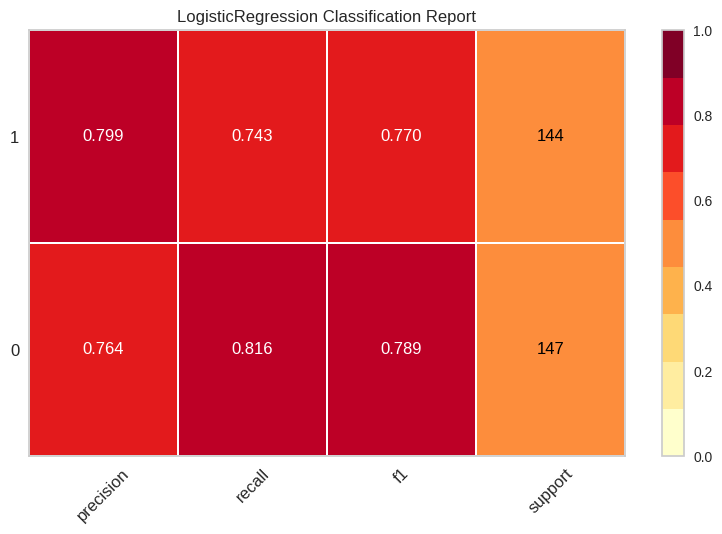

In [ ]:
plot_model(lr, plot = 'class_report')

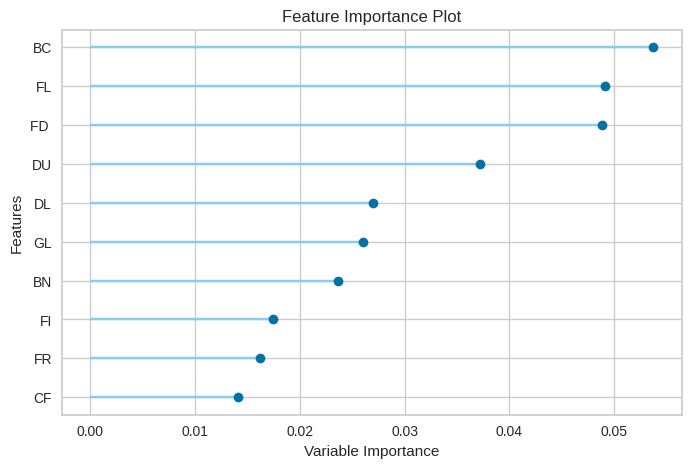

In [ ]:
plot_model(lr, plot = 'feature')

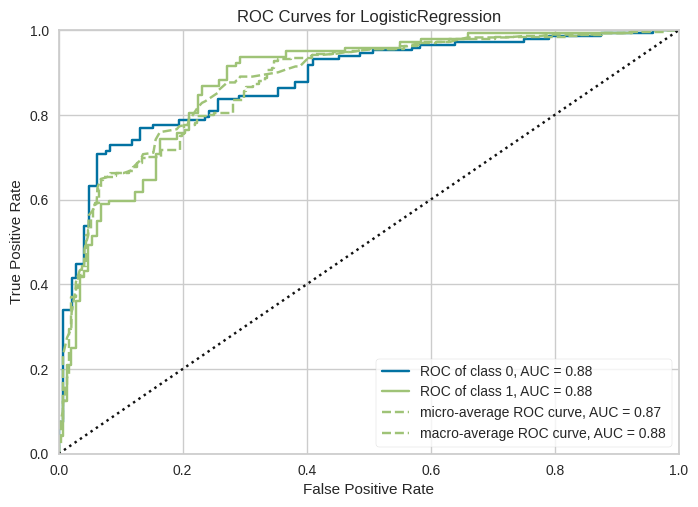

In [ ]:
plot_model(lr, plot = 'auc')

Verificamos

In [ ]:
unseen_predictions=predict_model(lr, data=data_unseen)
unseen_predictions

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8824,0.9667,0.8000,1.0000,0.8889,0.7671,0.7888


,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,GB,GE,GF,GH,GI,GL,EJ_encoded,Class,prediction_label,prediction_score
0,0.324748,5188.682129,85.200150,12.968687,8.138688,4.593391,0.025578,10.685041,1.229900,4951.698730,...,24.515421,98.929756,5563.130859,21.994831,33.300968,21.978001,0,0,0,0.8788
1,0.188012,2351.134033,85.200150,12.291993,8.138688,3.171522,0.025578,7.852292,1.229900,4131.189453,...,10.213596,72.611061,2083.716797,33.440628,25.925760,21.978001,0,0,0,0.9303
2,0.416618,4663.521484,214.659439,63.971630,22.281755,5.085066,0.047502,12.162860,7.231812,4420.843262,...,16.027346,87.871796,23639.947266,22.928802,117.571266,21.978001,0,0,0,0.5984
3,0.175193,2111.000000,85.200150,15.382799,9.263526,4.766142,0.039889,14.343352,1.229900,3909.970459,...,9.953140,131.946838,25097.255859,45.143173,68.353470,21.978001,0,0,0,0.9562
4,0.170920,1549.400146,85.200150,14.487766,8.138688,5.767209,0.049938,9.560134,5.896492,5486.860840,...,19.887676,281.460083,14301.991211,26.809805,101.938644,21.978001,0,0,0,0.9410
5,2.042494,3209.183838,105.701134,14.837727,8.138688,9.992952,0.025578,13.177482,1.229900,6366.320312,...,16.594769,140.632858,14173.430664,29.034964,21.499348,21.978001,0,0,0,0.8337
6,0.333294,4239.491699,129.137054,102.612900,8.138688,3.596754,0.025578,10.335280,1.229900,4393.349609,...,10.687998,138.843979,3272.364258,29.131708,49.042896,0.095264,1,0,0,0.7241
7,0.482849,192.593277,85.200150,37.668812,8.138688,1.878108,0.029232,3.396778,4.188688,2185.257080,...,13.339068,139.745041,30872.916016,16.465425,124.183876,21.978001,0,0,0,0.5504
8,0.452938,2379.684082,92.472160,41.992222,8.138688,7.220085,0.025578,6.302000,1.229900,2211.528076,...,11.599594,72.611061,762.097351,52.670753,10.840980,0.068062,1,0,0,0.7155
9,0.183739,4592.722168,85.200150,18.154613,8.138688,1.169388,0.025578,14.935740,1.229900,6398.160156,...,25.868862,409.822510,6616.737793,28.041456,24.848091,0.368280,1,0,0,0.8470
